# Problem Statment
    
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##  The Steps we are using as follows:
 1. Reading, Understaning The Data
 2. Visualising the Data
 3. Preparing the data for modelling ( train-test split, rescaling, etc.
 4. Training The Model
 5. Residual Analysis
 6. Predictions and Evaluation on the Test Set

# STEP 1: Reading and Understanding the Data
   
<span style="color: blue; font-size: 18px;"> - Importing data using the pandas library  </span>   
<span style='color:blue; font-size: 18px;'> - Understanding the structure of the data  </span>   


In [1]:
# Importing the numpy and pandas packages

import numpy as np
import pandas as pd

# Ignore Warnings 
import warnings
warnings.filterwarnings('ignore')

# Packages for Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# For Train and Test the Data
import sklearn
from sklearn.model_selection import train_test_split

# For rescaling 
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# For Building model using statsmodel
import statsmodels.api as sm  

# Evaluate test Data
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Read and Loading BoomBikes CSV file
BoomBikes = pd.read_csv("BooMBikes.csv")
BoomBikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3]:
# The number of rows and coloumns 
BoomBikes.shape

(730, 16)

In [4]:
# List summary of all columns in dataset
BoomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Understand DataTypes of Columans 
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check null, missing values 
BoomBikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<span style="color: blue; font-size: 18px;"> No null values in the columns </span>

In [7]:
# Get Column names 
BoomBikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# Column Names are not proper, we can rename the column names
BoomBikes.rename(columns= {'dteday': 'Date', 'season': 'Season', 'yr': 'Year', 'mnth': 'Month', 'weekday': 'Weekday', 'workingday': 'Workingday', 'hum': 'Humidity', 'cnt': 'Count'}, inplace=True)

In [9]:
# mapping variables as given in Dictionary 

BoomBikes['Season']=BoomBikes.Season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
BoomBikes['Month']=BoomBikes.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
BoomBikes['weathersit']=BoomBikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
BoomBikes['Weekday']=BoomBikes.Weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

BoomBikes.head()

,instant,Date,Season,Year,Month,holiday,Weekday,Workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Identifying Continuous and Categorical Variables
BoomBikes.dtypes

instant         int64
Date           object
Season         object
Year            int64
Month          object
holiday         int64
Weekday        object
Workingday      int64
weathersit     object
temp          float64
atemp         float64
Humidity      float64
windspeed     float64
casual          int64
registered      int64
Count           int64
dtype: object

In [11]:
# Continuous Variables
cont_cols = ["temp", "Humidity",'casual','windspeed','registered','atemp','Count','instant']
# Categarical Variables
cat_cols=['Year','holiday', 'Workingday','Month', 'weathersit', 'Season', 'Weekday',]
# Target Variable
target=["Count"]
len(cont_cols)+len(cat_cols)+len(target)

16

# STEP 2: Visualisation the Data


## Univariate Analysis

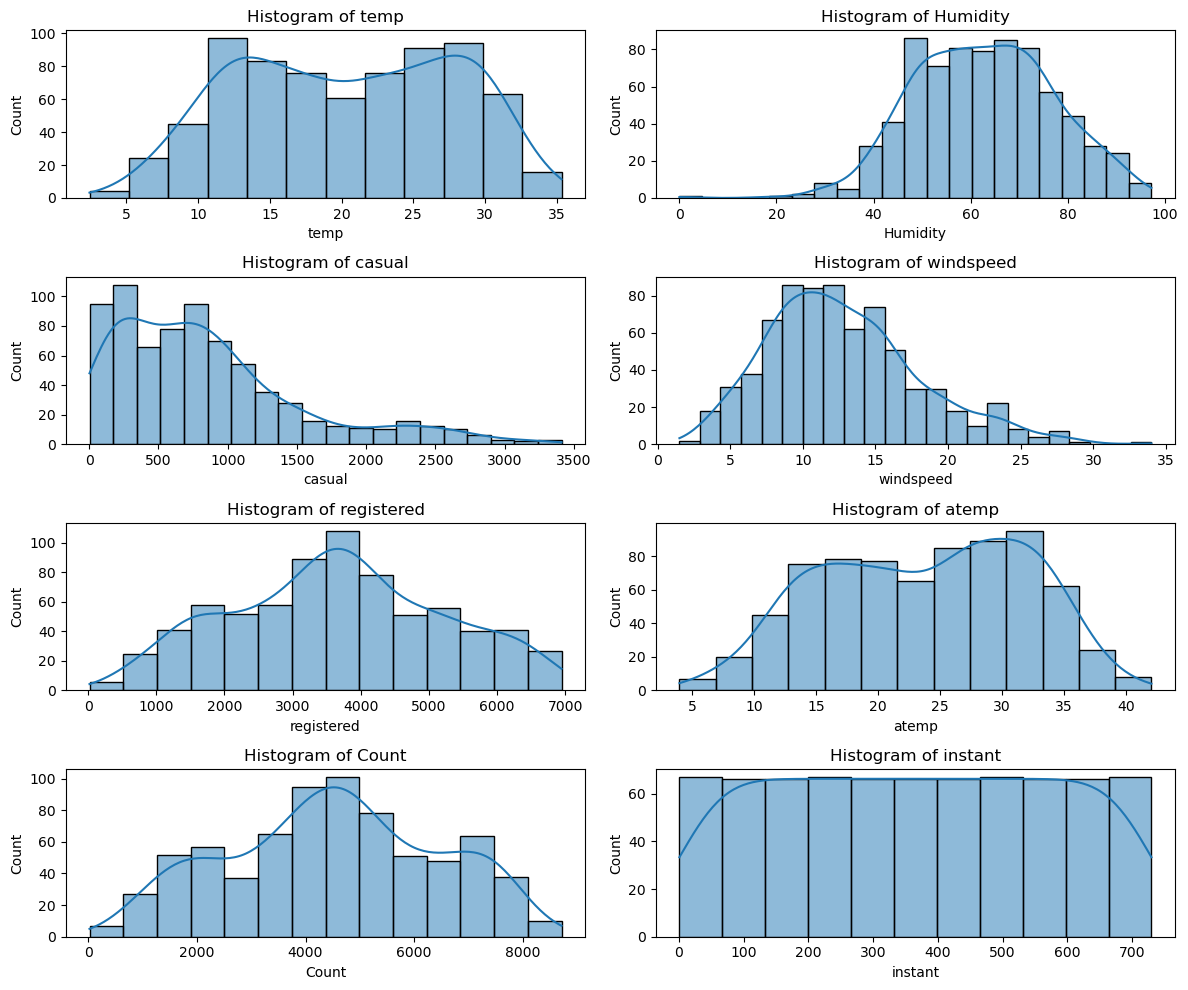

In [12]:

# Define the number of rows and columns in the grid
n_rows = len(cont_cols) // 2  
n_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

# Flatten the axes array if there's only one row
axes = axes.flatten()

# Plot each histogram

for i, col in enumerate(cont_cols):
    sns.histplot(x=BoomBikes[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## Bivariate Analysis

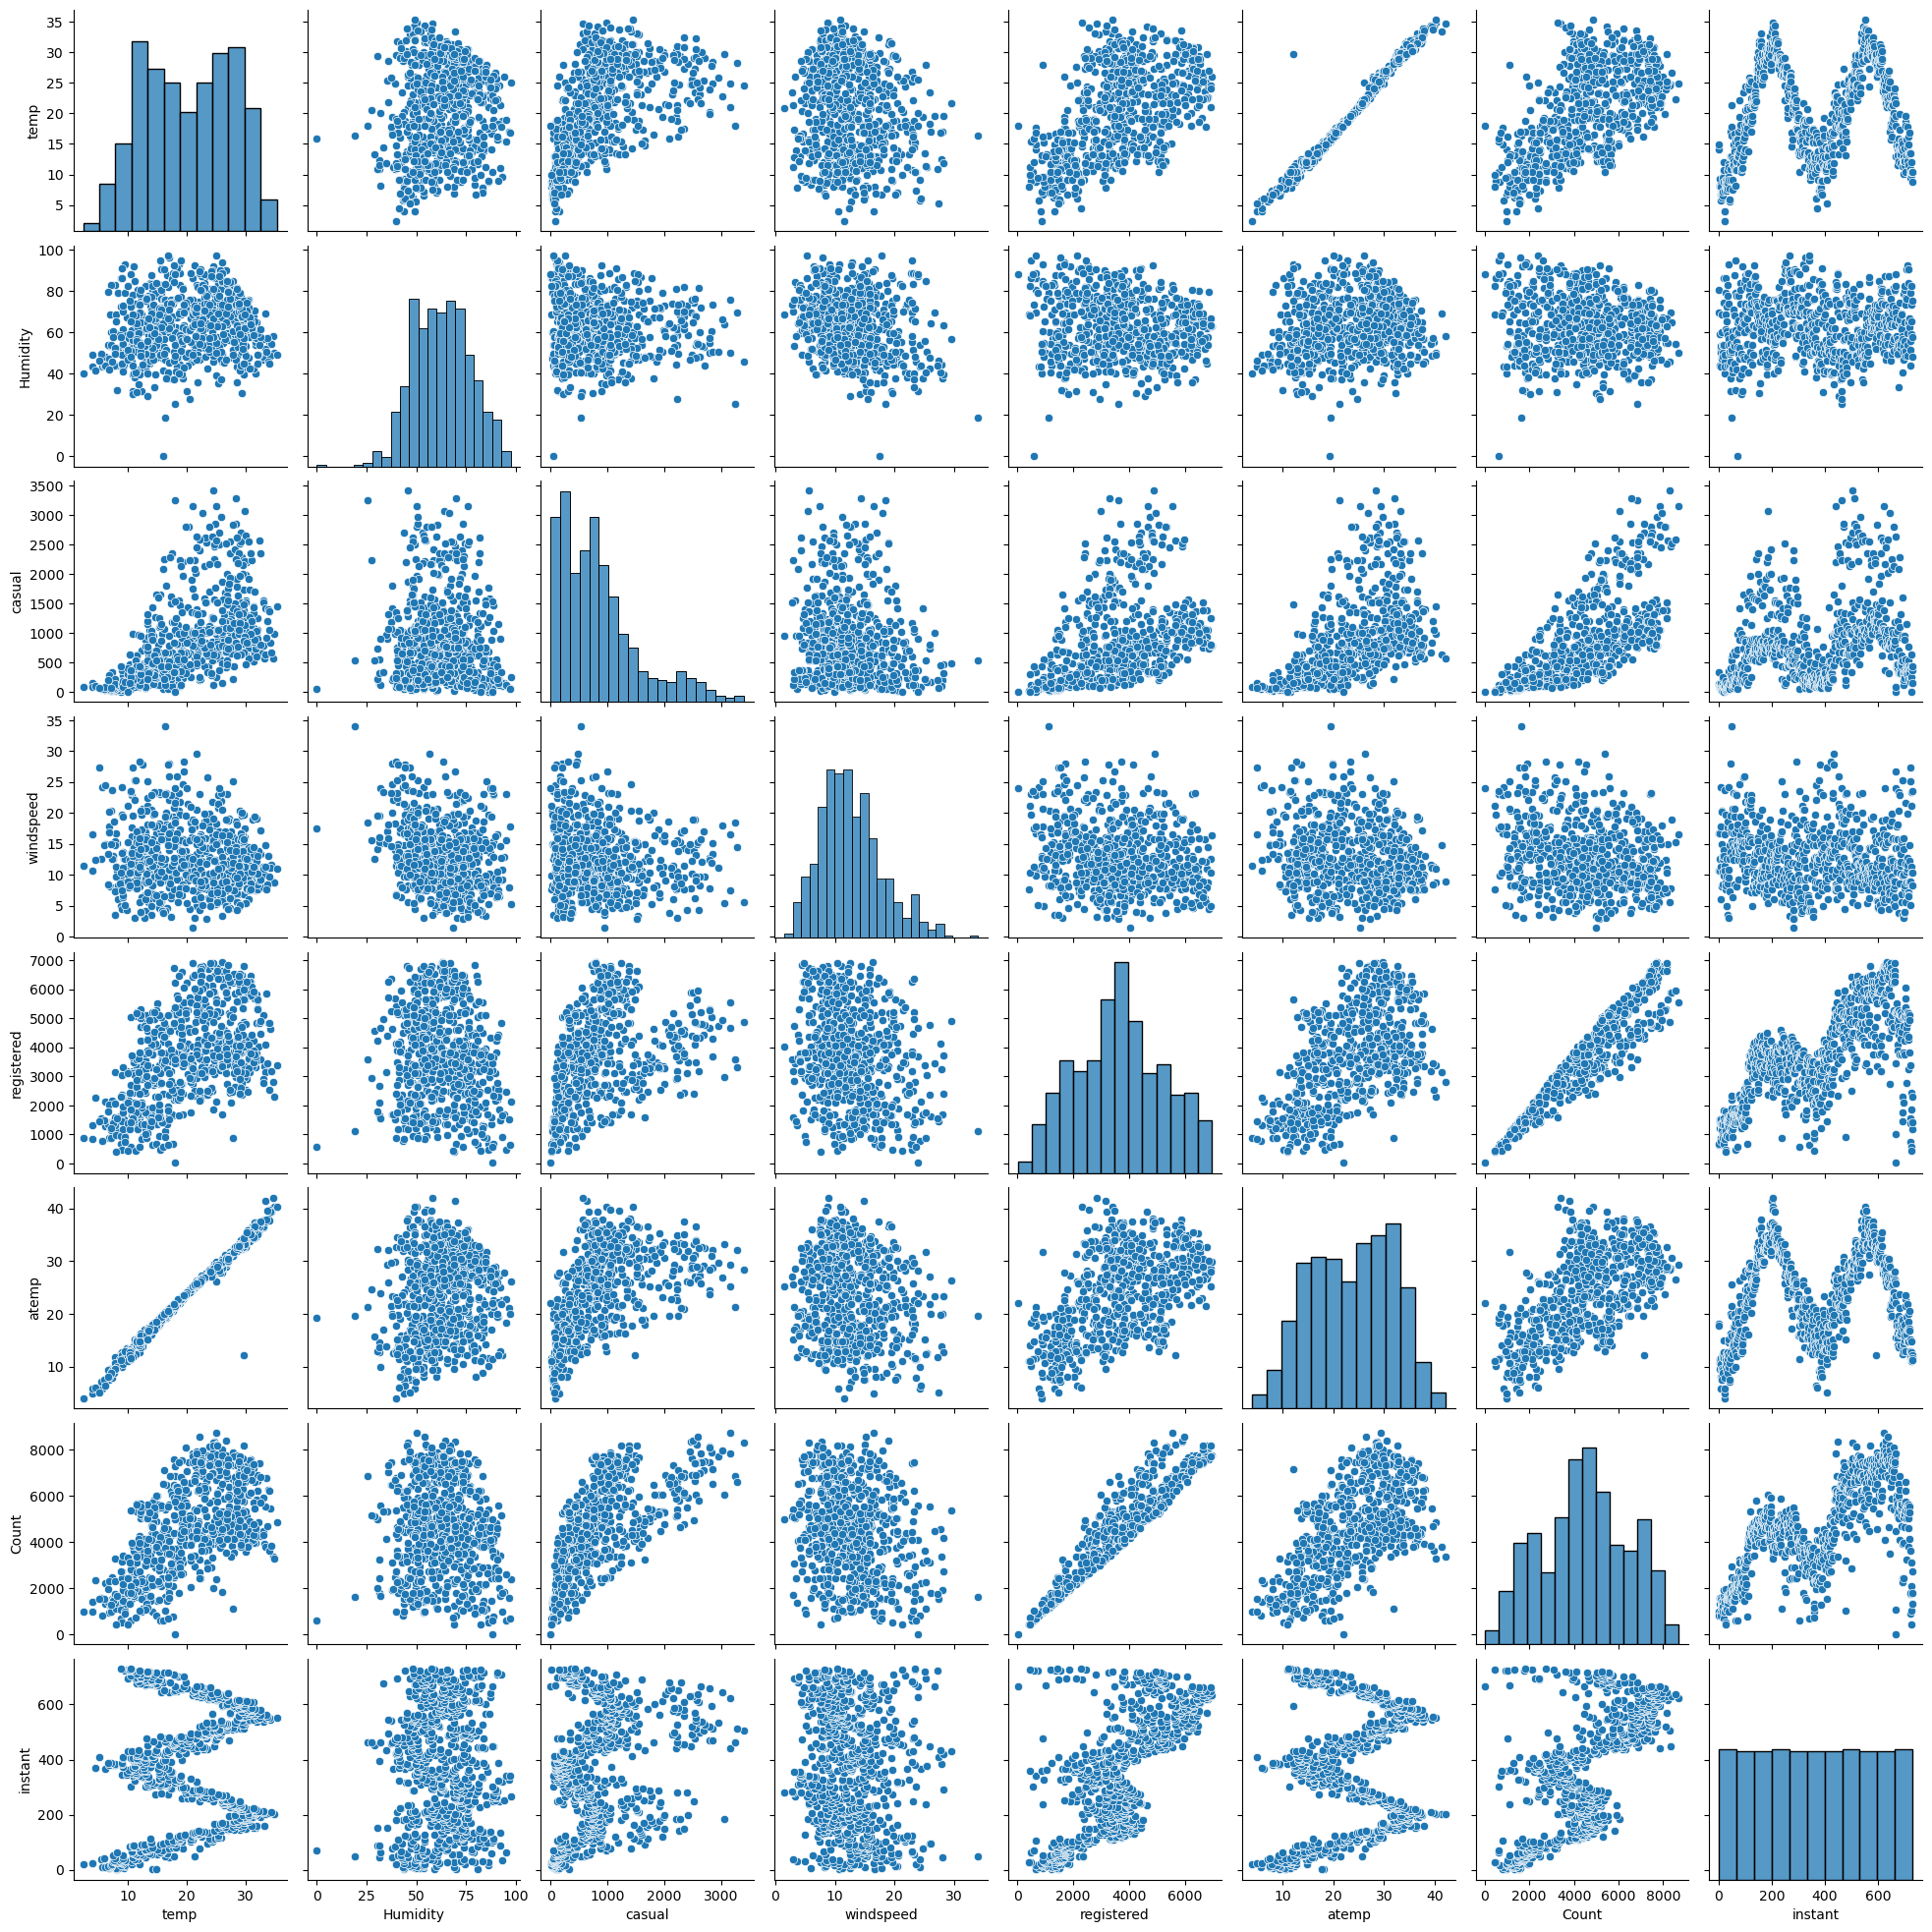

In [13]:
# Bivariate Analysis Continuous Variables Vs Price

#### A pairplot of all the numeric variables, to visualise which variables are most correlated to the target variable 'count'
sns.pairplot(BoomBikes, vars= cont_cols)
plt.show()



<span style="color: blue; font-size: 18px;"> Upon examining each of the aforementioned plots, we can observe that certain independent variables have a positive correlation with the 'count' variable. <br> <br>

<span style="color: Purples; font-size: 18px;">
    &#8226; Temperature has a stronger correlation with bike rentals. <br>
</span>

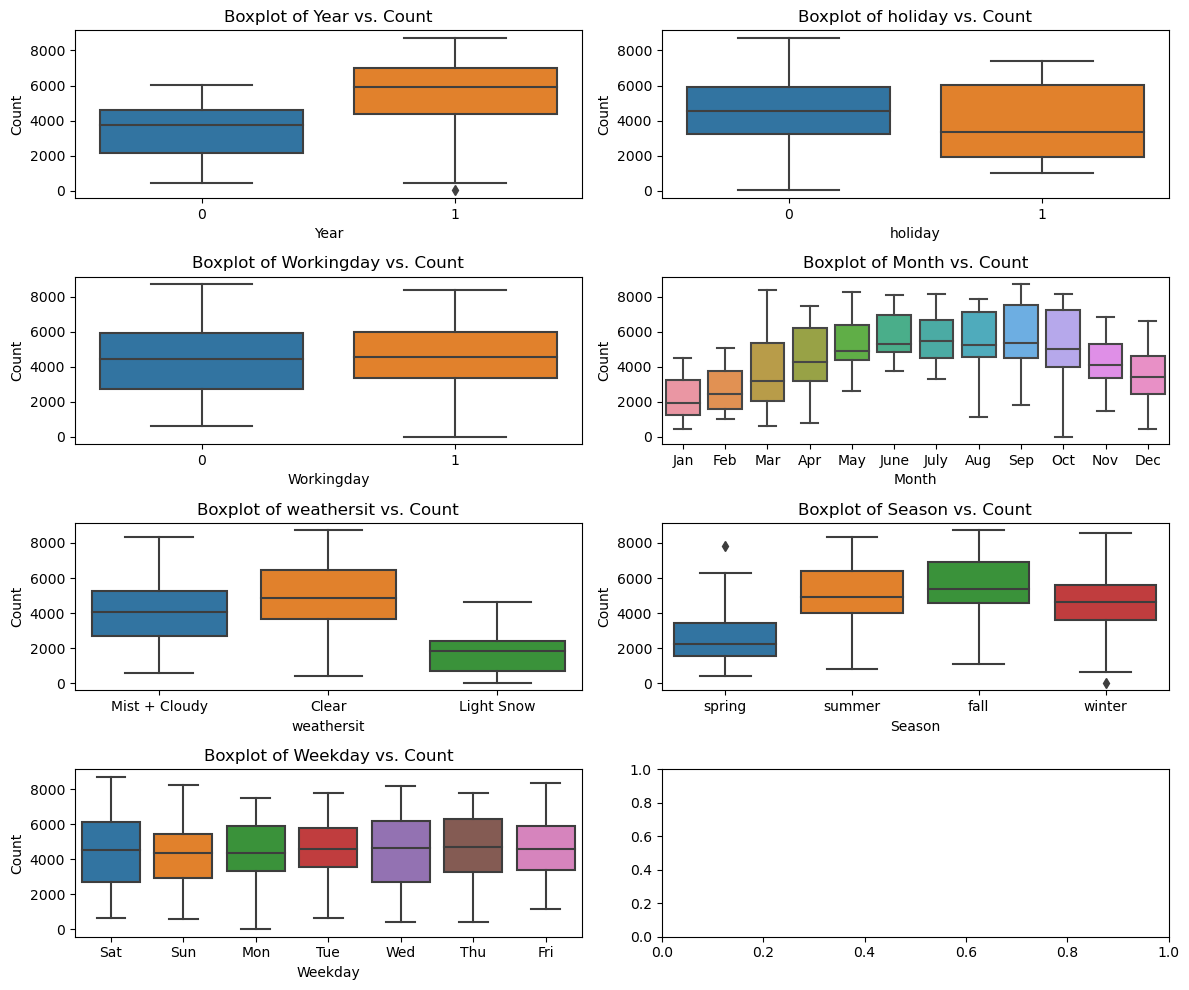

In [14]:
##Relationship between categorical and target variable

# Define the number of rows and columns in the grid
n_rows = len(cont_cols) // 2  
n_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))

# Flatten the axes array if there's only one row
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(cat_cols):
    sns.boxplot(x=BoomBikes[col], y=BoomBikes["Count"], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} vs. Count')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



<span style="color: blue; font-size: 18px;"> The relationship between category variables and a target variable is depicted in the charts above.<br><br>

<span style="color: Purples; font-size: 18px;">
    &#8226; Bike Rentals higher in 2019 than 2018 <br>
    &#8226; Bike rentals higher in partly clouded wheather. <br>
    &#8226; Rentals are higher in the fall and then in the summer. <br>
    &#8226; Bike rentals are dip in spring
    &#8226; There are more bike rentals on Saturday, Wednesday, and Thursday.<br>
    &#8226; There are more bike rentals in months of June, July, Aug, Sep, Oct.<br>
    </span>

## Multivariate Analysis


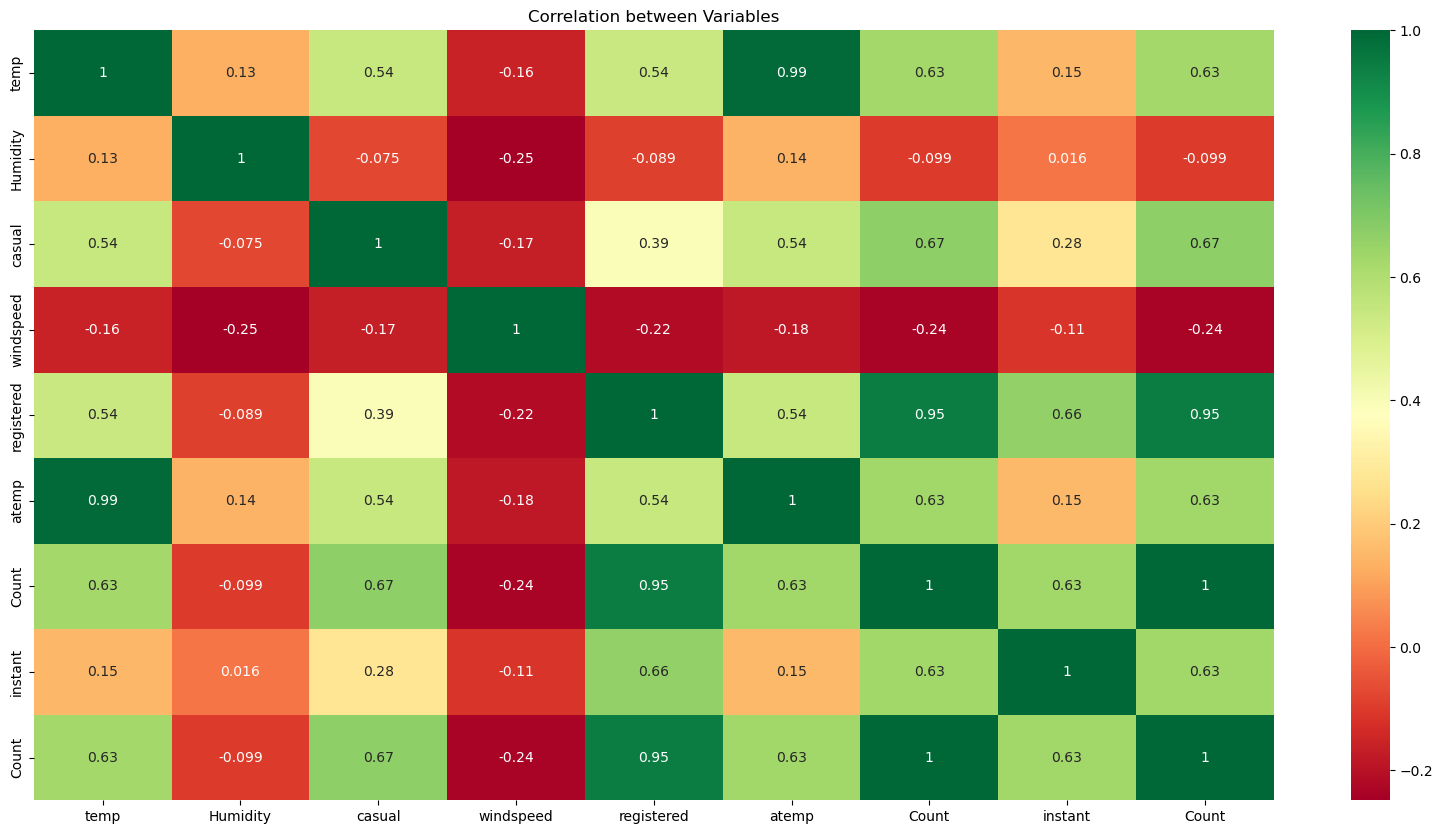

In [15]:
#Heatmap to see correlation between variables
plt.figure(figsize=(20, 10))
sns.heatmap(BoomBikes[cont_cols+["Count"]].corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()


<span style="color: blue; font-size: 18px;"> The temp, casual, registered, atemp, and instant variables are correlated with the 'count' variable, as the pairplot and heatmap show. <br>

<span style="color: blue; font-size: 18px;"> It is also evident that certain other variables have the highest correlation.<br>

<span style="color: blue; font-size: 18px;"> The two graphs above aid in properly interpreting the data and identifying the variables that may prove helpful in developing the model.

<span style="color: red; font-size: 20px;"> Yes, a linear regression model is something we can think about.<br> <br> 

In [16]:
# We can see some unnessary columns in the dataset and we can drop them. 
#drop unnecessary columns
BoomBikes=BoomBikes.drop(['instant','Date','casual', 'registered','atemp'], axis=1)
BoomBikes.head(10)

,Season,Year,Month,holiday,Weekday,Workingday,weathersit,temp,Humidity,windspeed,Count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600
5,spring,0,Jan,0,Thu,1,Clear,8.378268,51.8261,6.000868,1606
6,spring,0,Jan,0,Fri,1,Mist + Cloudy,8.057402,49.8696,11.304642,1510
7,spring,0,Jan,0,Sat,0,Mist + Cloudy,6.765000,53.5833,17.875868,959
8,spring,0,Jan,0,Sun,0,Clear,5.671653,43.4167,24.250650,822
9,spring,0,Jan,0,Mon,1,Clear,6.184153,48.2917,14.958889,1321


In [17]:
# Check the datatypes of all columns 
BoomBikes.dtypes

Season         object
Year            int64
Month          object
holiday         int64
Weekday        object
Workingday      int64
weathersit     object
temp          float64
Humidity      float64
windspeed     float64
Count           int64
dtype: object

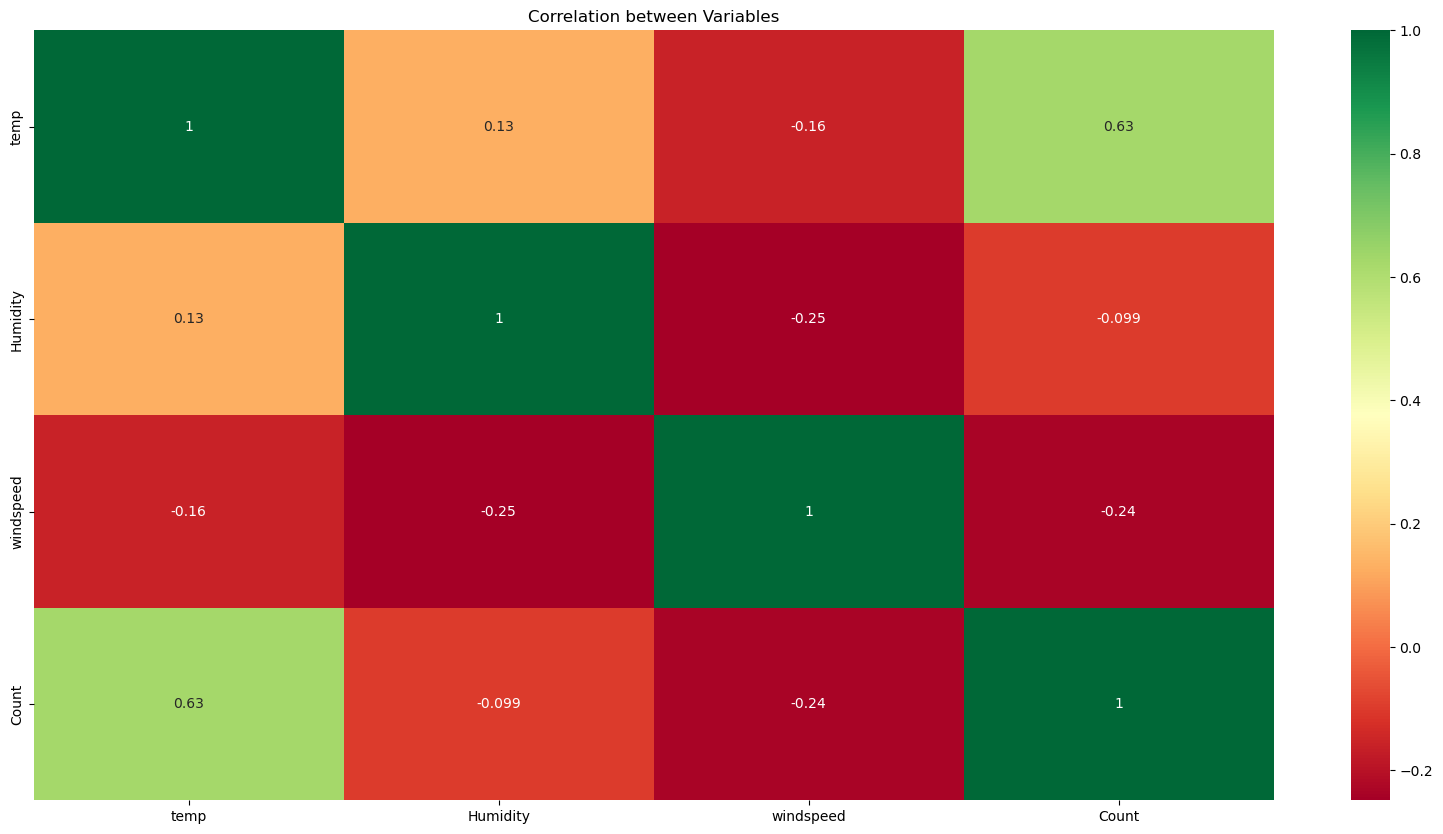

In [18]:
# Heatmap to see correlation between variables after droping continuous unnecerary columns
plt.figure(figsize=(20, 10))
sns.heatmap(BoomBikes[['temp', 'Humidity','windspeed','Count']].corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

# STEP 3: Preparing the data for modelling ( train-test split, rescaling, etc.)
<span style="color: blue; font-size: 18px;"> Encoding:<br>
    
<span style="color: Purples; font-size: 18px;">
       &#8226; Converting Categarical Vars to Dummy Vars <br>
       &#8226; Spliting Into Train and Test <br>
       &#8226; Rescaling of Variables 

In [19]:
# # Get the dummy variables 

# Convert categorical values to binary columns
BoomBikes = pd.get_dummies(columns=["Season","Month","Weekday","weathersit"], data=BoomBikes, drop_first=True)
BoomBikes.head()

,Year,holiday,Workingday,temp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,...,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
BoomBikes.shape

(730, 29)

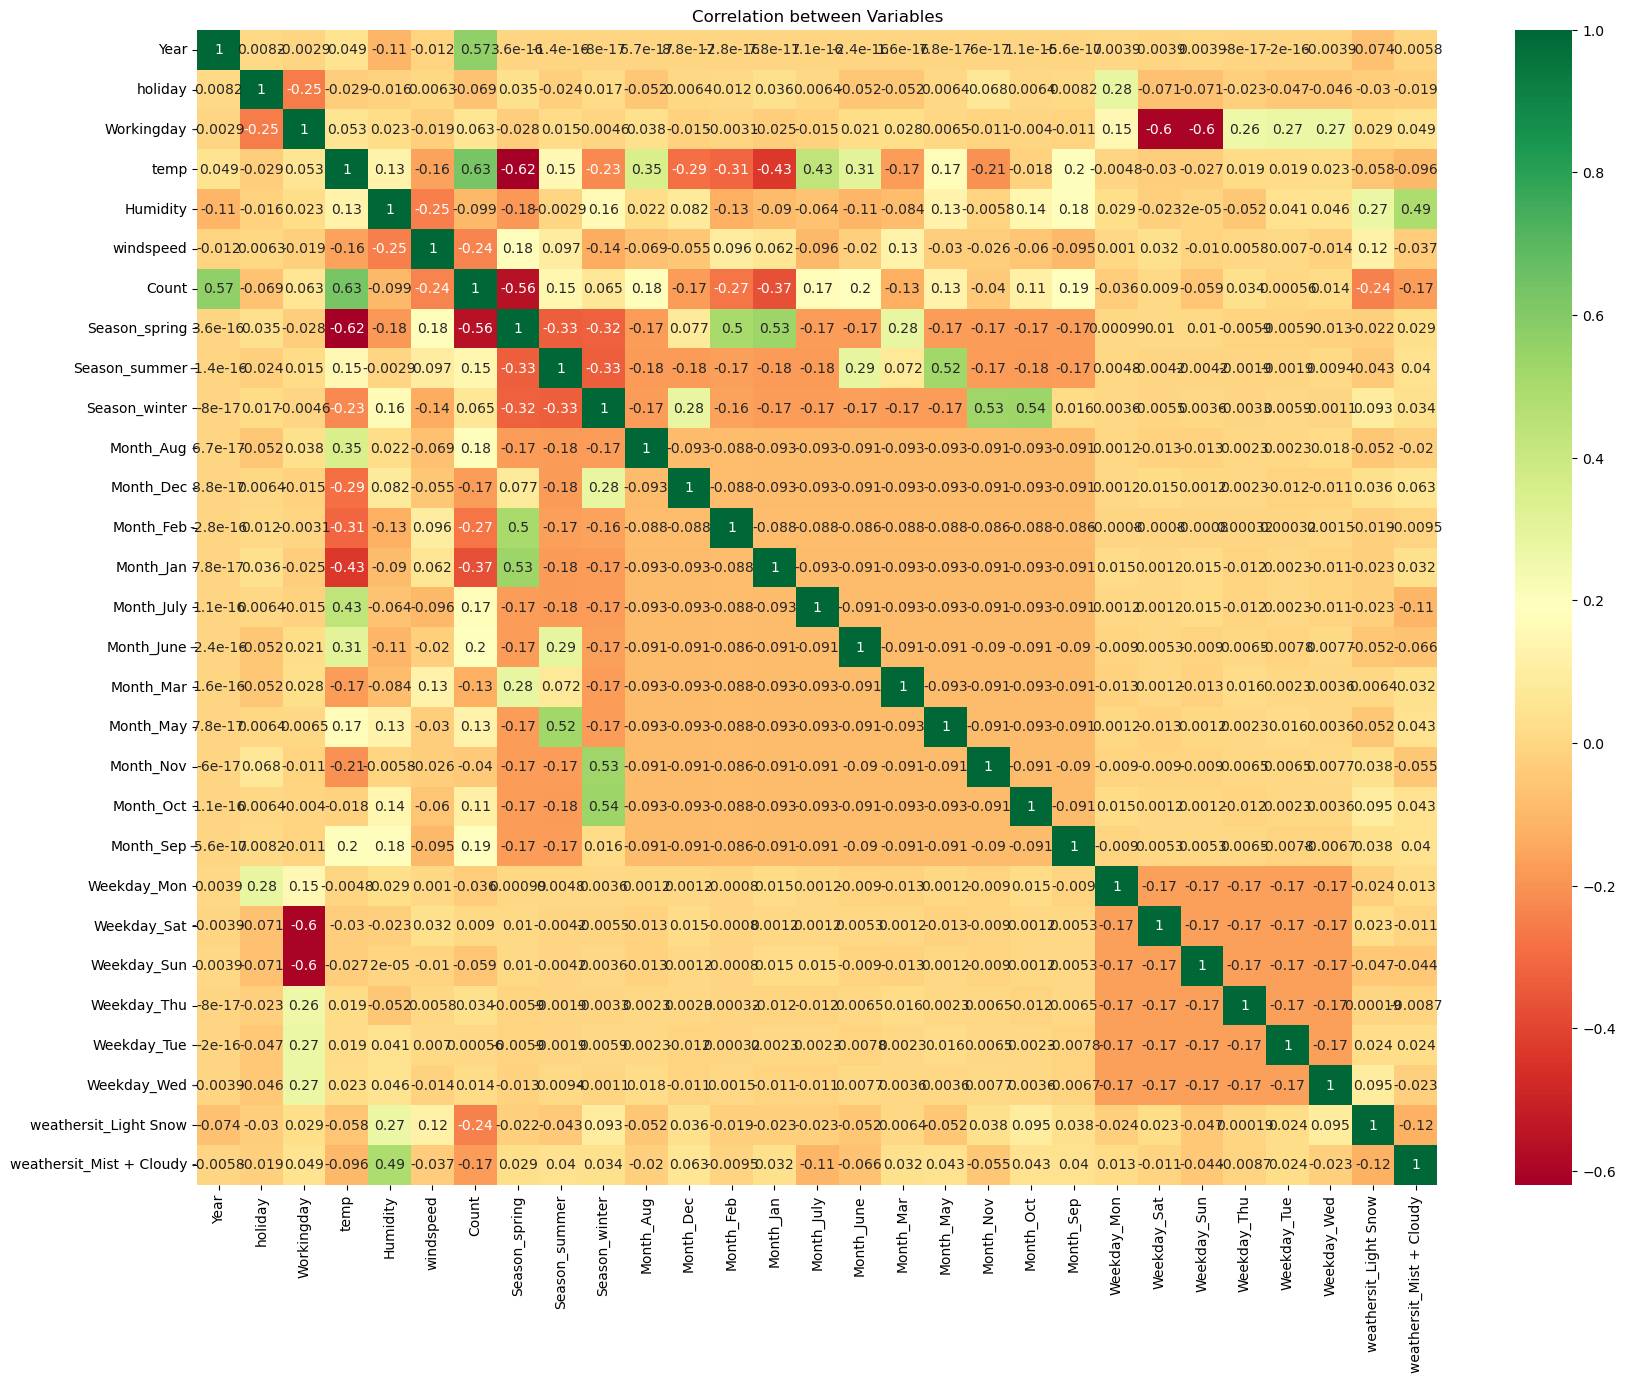

In [21]:
#Now lets check the correlation between variables again
plt.figure(figsize=(20, 15))
sns.heatmap(BoomBikes.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

<span style="color: blue; font-size: 18px;"> It is evident that the 'count' variable has a significant correlation with temperature, summer season, and the months of June through October. and appear to have a positive impact on the count of bike rentals.

## Split Train and Test

In [22]:
# Split Data into Train & Test
BoomBikes_train, BoomBikes_test = train_test_split(BoomBikes, train_size = 0.7, random_state = 100)
print(BoomBikes_train.shape) 
print(BoomBikes_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features

It is extreamly important to rescale the variables so that they will have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as comparing with other coefficients. So, It is important to have all the variables on the same scale for the model to be easily interpretable. 

So it advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:

Min-Max scaling (Normalisation):Between 0 and 1

Standardisation :mean-0, sigma-1

- Normalisation = (x-xmin)/(x max-x min)

- Standardisation= (x-mu)/ sigma

In [23]:
#Instantiate an object
scaler = MinMaxScaler()

# Create a list of numaric vars
num_vars = ['temp','Humidity','windspeed','Count']

#Fit on data
BoomBikes_train[num_vars] = scaler.fit_transform(BoomBikes_train[num_vars])
BoomBikes_train.head()

,Year,holiday,Workingday,temp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,...,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
BoomBikes_train.describe()

,Year,holiday,Workingday,temp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,...,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<span style="color: blue; font-size: 18px;"> All the numeric variables are now mapped between 0 and 1, Check min and max

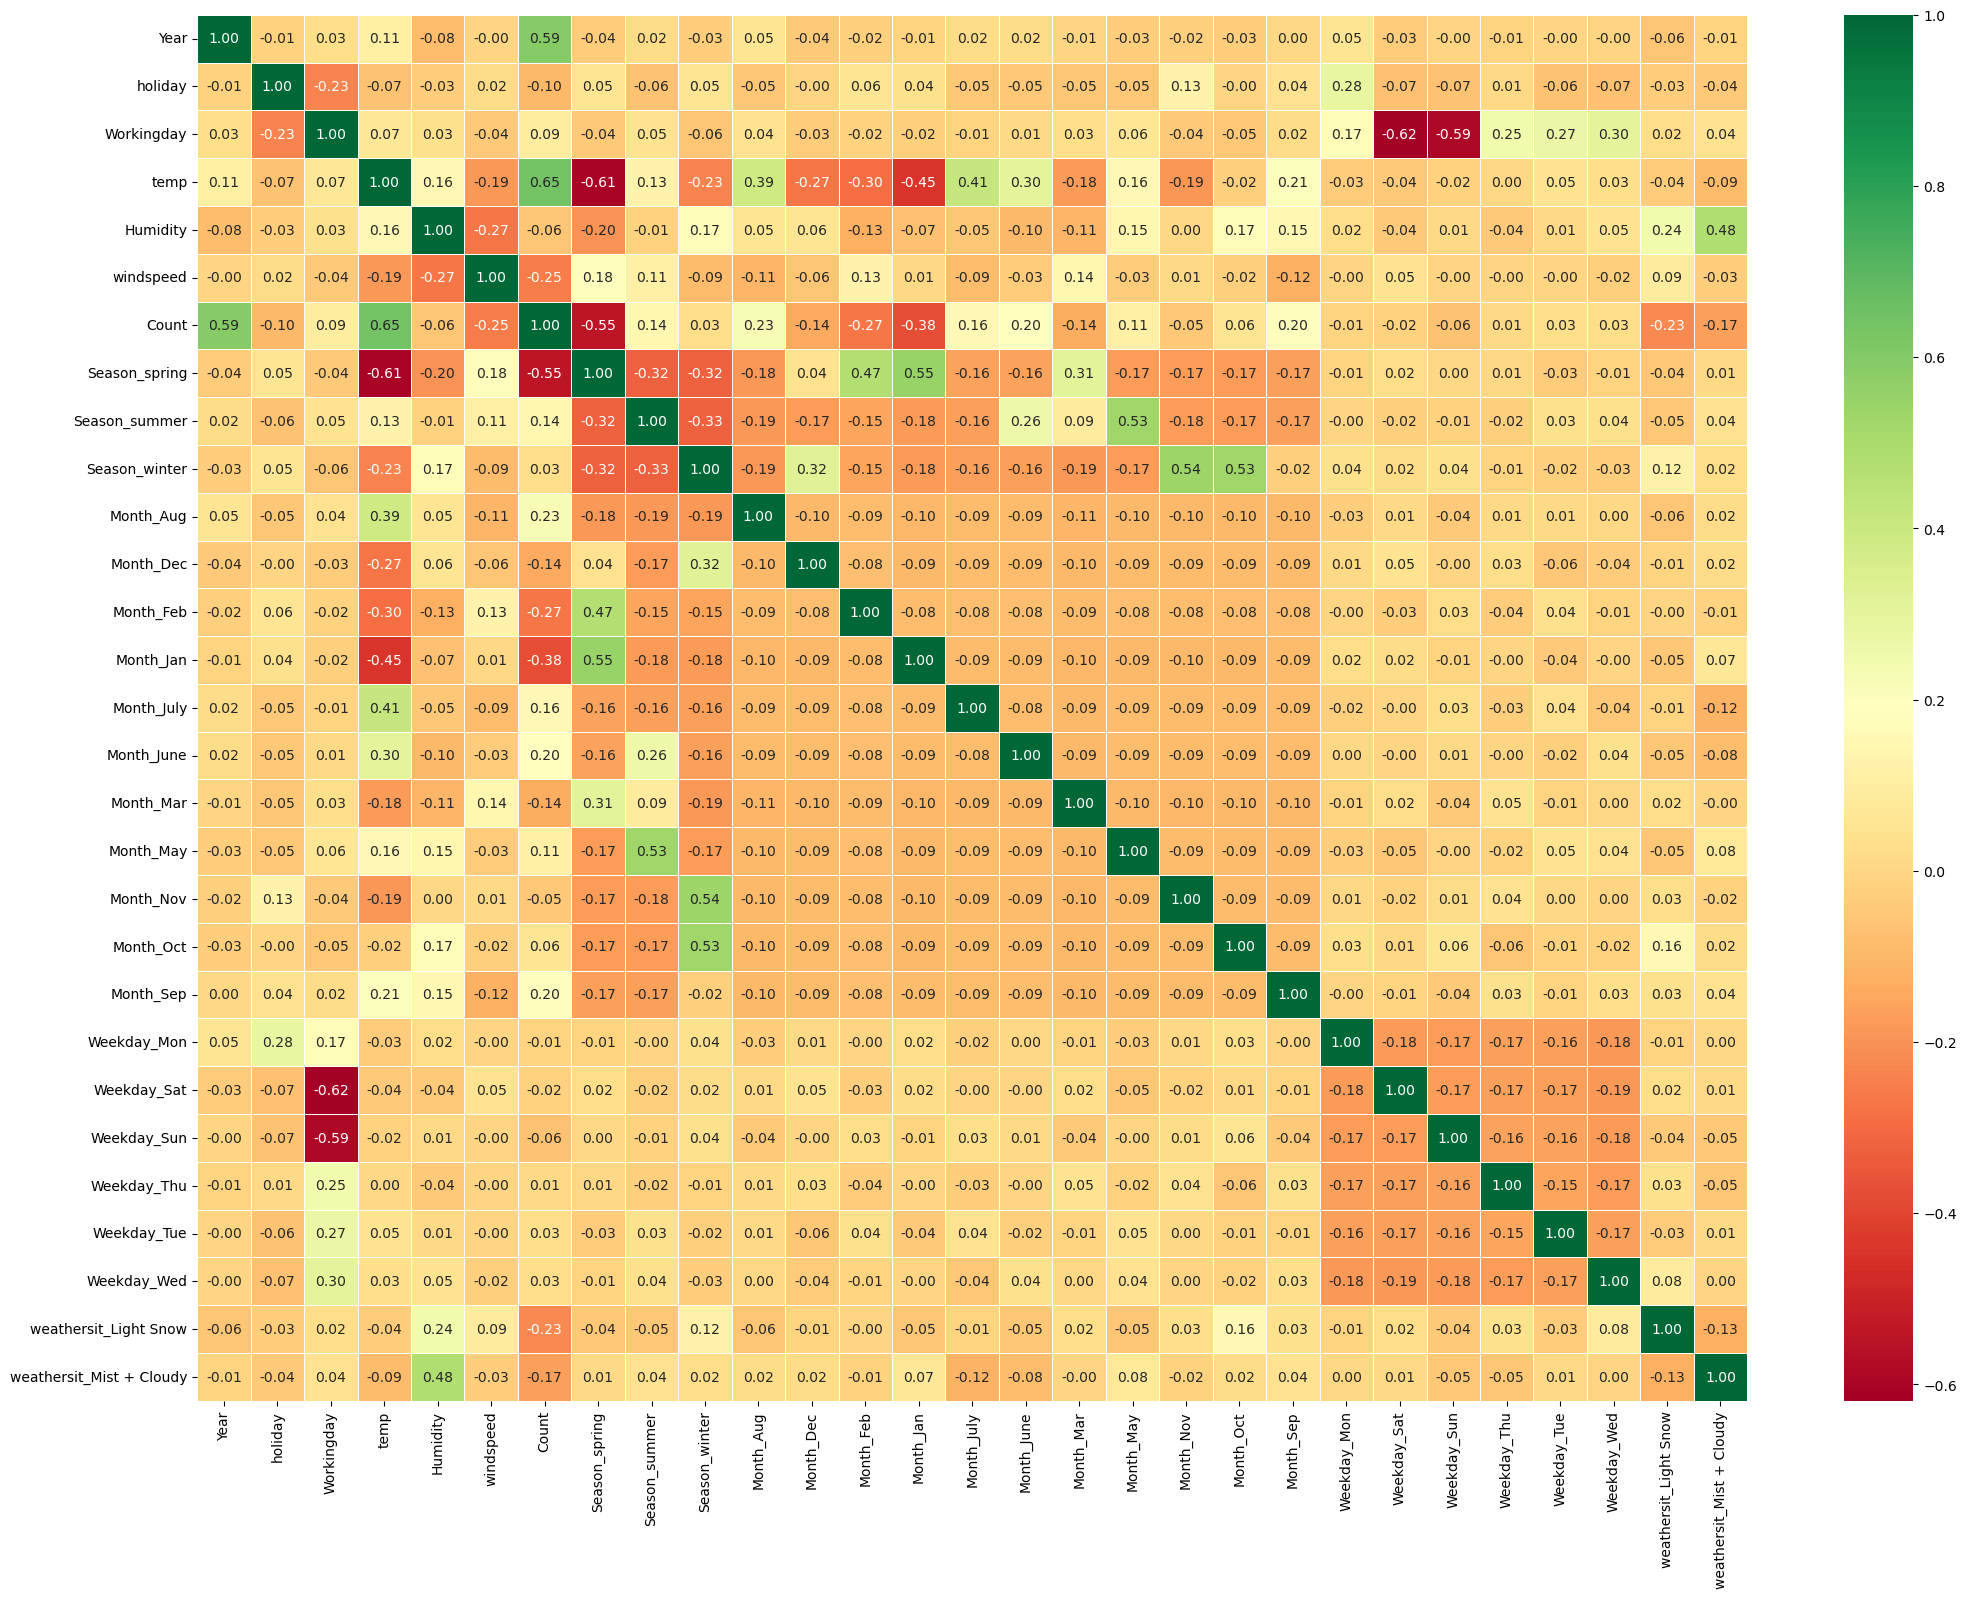

In [25]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors
plt.figure(figsize=(25, 18))
sns.heatmap(BoomBikes_train.corr(), annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.show()

<span style="color: blue; font-size: 18px;"> We can observe from the heatmap that the 'count' variable is associated with both temp and year. We can see that the counts are a tad high, even in the months of June to September and Summer also.

In [26]:
#Divide the data into X and y
y_train = BoomBikes_train.pop('Count')
X_train = BoomBikes_train

# Step 4: Training The Model

<span style="color: red; font-size: 18px;"> Using RFE - Recursive Feature Elimination for training the model

In [27]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('Workingday', True, 1),
 ('temp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', True, 1),
 ('Season_winter', True, 1),
 ('Month_Aug', False, 7),
 ('Month_Dec', False, 4),
 ('Month_Feb', False, 5),
 ('Month_Jan', False, 2),
 ('Month_July', True, 1),
 ('Month_June', False, 11),
 ('Month_Mar', False, 14),
 ('Month_May', False, 6),
 ('Month_Nov', False, 3),
 ('Month_Oct', False, 8),
 ('Month_Sep', True, 1),
 ('Weekday_Mon', False, 9),
 ('Weekday_Sat', True, 1),
 ('Weekday_Sun', True, 1),
 ('Weekday_Thu', False, 12),
 ('Weekday_Tue', False, 10),
 ('Weekday_Wed', False, 13),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [29]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'Workingday', 'temp', 'Humidity', 'windspeed',
       'Season_spring', 'Season_summer', 'Season_winter', 'Month_July',
       'Month_Sep', 'Weekday_Sat', 'Weekday_Sun', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [30]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Weekday_Mon',
       'Weekday_Thu', 'Weekday_Tue', 'Weekday_Wed'],
      dtype='object')

<span style="color: red; font-size: 18px;"> Building model using statsmodel, for the detailed statistics


In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [33]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        19:48:32   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Checking VIF

<span style="color: blue; font-size: 18px;"> Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

<span style="color: red; font-size: 18px;"> 𝑉𝐼𝐹𝑖 = 1 / 1−𝑅𝑖2
 

In [34]:
#Drop the constant Variable
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [35]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Workingday,50.68
11,Weekday_Sat,12.20
12,Weekday_Sun,11.79
6,Season_spring,5.02
3,temp,3.62
8,Season_winter,3.49
1,holiday,2.91
7,Season_summer,2.62
4,Humidity,1.91
14,weathersit_Mist + Cloudy,1.57


<span style="color: blue; font-size: 18px;"> We could have :

<span style="color: Purples; font-size: 18px;">
       &#8226; High p-value, High VIF<br>
       &#8226; High : Low<br>
                 - High p, Low VIF - Remove First <br>
                 - Low p, High VIF - Remove this after the above <br>
       &#8226; Low p, Low VIF

In [36]:
# Holidy is insignificant in presence of other variables due to high p-value and low VIF; can be dropped
#Drop holiday
X_train_new1 = X_train_rfe.drop(["holiday"], axis = 1)

In [37]:
#Build a model without holiday
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        19:48:33   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [38]:
#Drop the constant variable
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [39]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,32.10
2,temp,18.99
1,Workingday,18.41
4,windspeed,4.91
10,Weekday_Sat,4.91
5,Season_spring,4.80
11,Weekday_Sun,4.76
7,Season_winter,3.69
6,Season_summer,3.04
13,weathersit_Mist + Cloudy,2.31


In [40]:
# 'humidity' variable can be dropped as its insignificant by looking at very high VIF
#Drop humidity
X_train_new2 = X_train_lm1.drop(["Humidity"], axis = 1)

In [41]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.28e-188
Time:                        19:48:33   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [42]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [43]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,Weekday_Sat,4.45
10,Weekday_Sun,4.21
4,Season_spring,3.82
6,Season_winter,2.78
5,Season_summer,2.76
0,Year,2.07
7,Month_July,1.60


In [44]:
# 'Workingday' variable can be dropped as its insignificant by looking at very high VIF
#Drop Workingday
X_train_new3 = X_train_lm2.drop(["Workingday"], axis = 1)

In [45]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          2.06e-186
Time:                        19:48:33   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [46]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [47]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,Season_summer,2.24
3,Season_spring,2.11
0,Year,2.07
5,Season_winter,1.82
6,Month_July,1.59
11,weathersit_Mist + Cloudy,1.55
7,Month_Sep,1.33
8,Weekday_Sat,1.22


In [48]:
# 'Sat' variable can be dropped as its insignificant by looking at very high p Value
#Drop Sat
X_train_new4 = X_train_lm3.drop(["Weekday_Sat"], axis = 1)

In [49]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          3.37e-187
Time:                        19:48:33   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [50]:
#Drop constant 
X_train_lm4=X_train_lm4.drop(['const'],axis=1)

In [51]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,Season_summer,2.23
3,Season_spring,2.09
0,Year,2.07
5,Season_winter,1.80
6,Month_July,1.59
10,weathersit_Mist + Cloudy,1.55
7,Month_Sep,1.33
8,Weekday_Sun,1.17


In [52]:
# 'windspeed' variable can be dropped as its insignificant by low VIF and -ve correlation with count variable
#Drop Sat
X_train_new5 = X_train_lm4.drop(["windspeed"], axis = 1)

In [53]:
#Build a model
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          5.80e-181
Time:                        19:48:33   Log-Likelihood:                 481.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [54]:
#Drop constant 
X_train_lm5=X_train_lm5.drop(['const'],axis=1)

In [55]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.27
0,Year,2.06
3,Season_summer,1.95
4,Season_winter,1.59
5,Month_July,1.58
9,weathersit_Mist + Cloudy,1.55
2,Season_spring,1.40
6,Month_Sep,1.33
7,Weekday_Sun,1.17
8,weathersit_Light Snow,1.07


<span style="color: red; font-size: 20px;"> Now we can see we have our model.

The VIF shows the degree of correlation between the variables, while the p values indicate the importance of the variables. We selected the variable to be eliminated based on these two factors.
Both the VIFs and the p-values fall within a reasonable range. Thus, we proceed and use this model only to generate predictions.

- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.824or 82.4%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.82 or 82%

In [56]:
#### lets check one more model by dropping temp keeping Sat

In [57]:
#Drop temp for the lm4 model 
X_train_new6=X_train_lm4.drop(['temp'], axis=1)

In [58]:
#Building a model
X_train_lm6= sm.add_constant(X_train_new6)
lm6=sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          4.80e-149
Time:                        19:48:33   Log-Likelihood:                 406.20
No. Observations:                 510   AIC:                            -790.4
Df Residuals:                     499   BIC:                            -743.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<span style="color: red; font-size: 20px;"> Here we can see there is a huge drop on R-square and adjusted R-squared. So this wont be a good model. <br> <br>

<span style="color: green; font-size: 25px;"> So our model is lm5 good. 

# STEP 5 : Residual Analysis

<span style="color: blue; font-size: 18px;"> Now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
X_train_lm5=sm.add_constant(X_train_lm5)
X_train_lm5

,const,Year,temp,Season_spring,Season_summer,Season_winter,Month_July,Month_Sep,Weekday_Sun,weathersit_Light Snow,weathersit_Mist + Cloudy
576,1.0,1,0.815169,0,0,0,1,0,0,0,0
426,1.0,1,0.442393,1,0,0,0,0,0,0,1
728,1.0,1,0.245101,1,0,0,0,0,1,0,0
482,1.0,1,0.395666,0,1,0,0,0,0,0,1
111,1.0,0,0.345824,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0,0,0,0,0,0,0,0
53,1.0,0,0.202618,1,0,0,0,0,0,0,0
350,1.0,0,0.248216,0,0,1,0,0,0,0,1
79,1.0,0,0.462664,0,1,0,0,0,0,0,1


In [60]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

<Figure size 640x480 with 0 Axes>

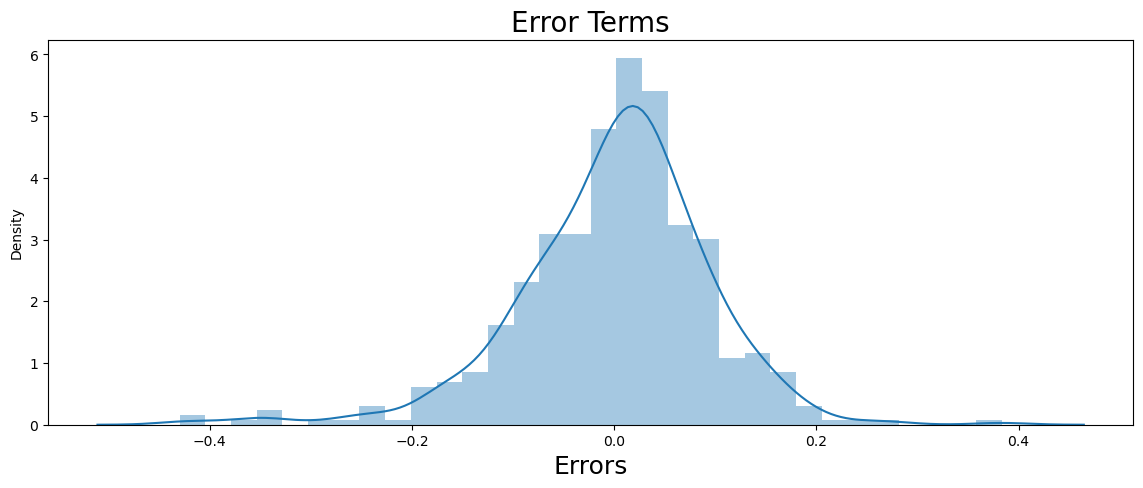

In [61]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,5))
sns.distplot((y_train - y_train_pred))
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

<span style="color: blue; font-size: 18px;"> We can observe the above picture that Error terms are perfectly normally distributed

# STEP 6 : Predictions and Evaluation on the Test Set

In [62]:
# Applying the scaling on the test sets
#Create a list of numeric variables
num_vars=['temp','Humidity','windspeed','Count']

#Fit on data
BoomBikes_test[num_vars] = scaler.transform(BoomBikes_test[num_vars])
BoomBikes_test.head()

,Year,holiday,Workingday,temp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,...,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
# Dividing into X_test and y_test
#Dividing into X_test and y_test
y_test = BoomBikes_test.pop('Count')
X_test = BoomBikes_test
X_test.describe()

,Year,holiday,Workingday,temp,Humidity,windspeed,Season_spring,Season_summer,Season_winter,Month_Aug,...,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
#Columns
X_train_new5.columns

Index(['Year', 'temp', 'Season_spring', 'Season_summer', 'Season_winter',
       'Month_July', 'Month_Sep', 'Weekday_Sun', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [65]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Year,temp,Season_spring,Season_summer,Season_winter,Month_July,Month_Sep,Weekday_Sun,weathersit_Light Snow,weathersit_Mist + Cloudy
184,1.0,0,0.831783,0,0,0,1,0,0,0,1
535,1.0,1,0.901354,0,1,0,0,0,0,0,0
299,1.0,0,0.511964,0,0,1,0,0,0,0,1
221,1.0,0,0.881625,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0,1,0,0,0,0,0,0


In [66]:
# Making predictions
y_pred = lm5.predict(X_test_new1)


In [67]:
#Evaluate R-square for test

r2_score(y_test,y_pred)

0.8101118623591823

In [68]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)
Adj_r2=1-(1-0.810111)*(11-1)/(11-1-1)
print(Adj_r2)

0.7890122222222222


## Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

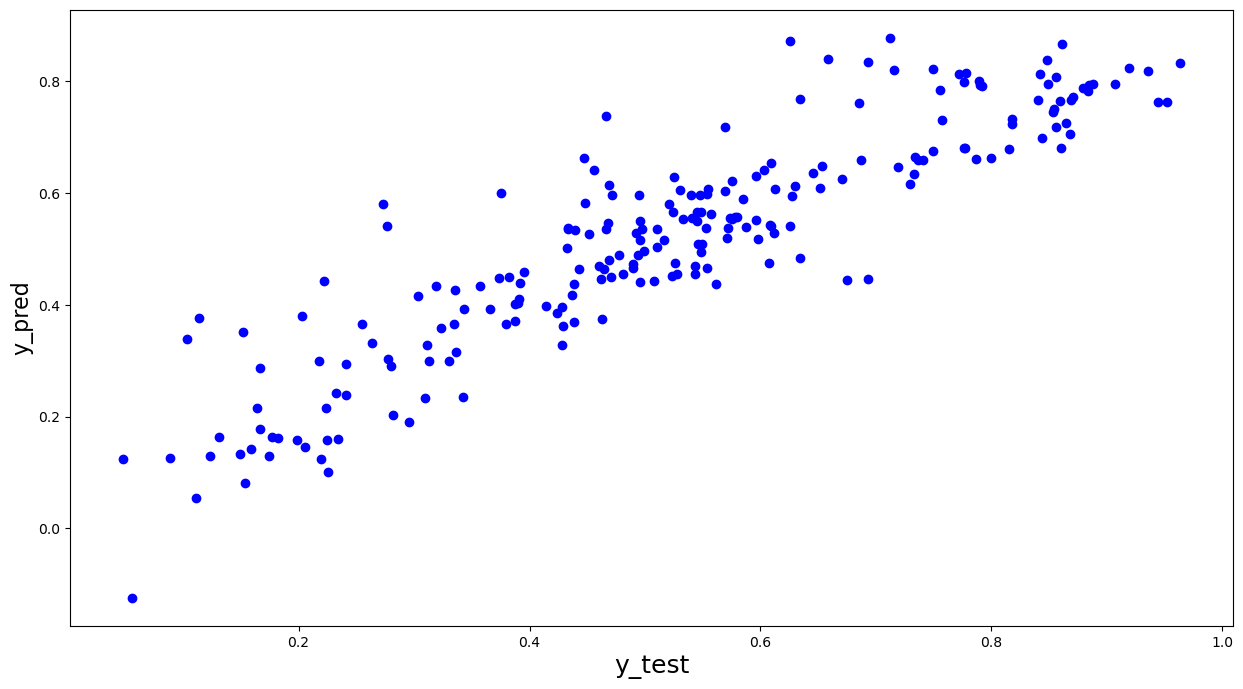

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

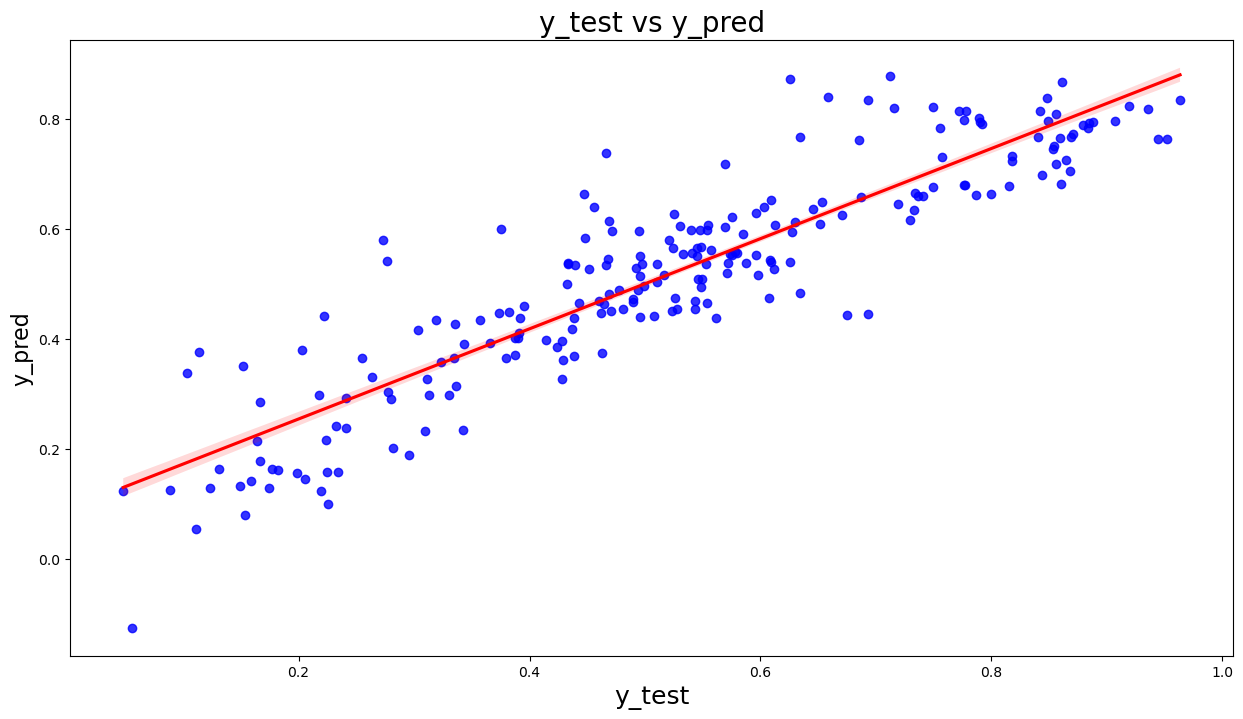

In [70]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

#### <span style="color: blue; font-size: 18px;"> We can see that the equation of our best fitted line is:

 <span style="color: red; font-size: 20px; font-weight: bold;"> 𝑐𝑜𝑢𝑛𝑡 = 0.503×𝑡𝑒𝑚𝑝 + 0.233xYear + 0.0829xwinter + 0.0379×𝑠𝑢𝑚𝑚𝑒𝑟 - 0.0778×spring - 0.0785×MistCloudy - 0.299xLightSnow − 0.0449xSun − 0.0766×Sep − 0.0485xJuly
 

## Final Result Comparison between Train model and Test:

- Train R^2 : 0.824
- Train Adjusted R^2 : 0.82
- Test R^2: 0.81
- Test Adjusted R^2: 0.7890
- Difference in R^2 between train and test: 1.4%
- Difference in adjusted R^2 between Train and test: 3.15% which is less than 3.1%

<span style="color: green; font-size: 25px;"> This is Good Model

## Interpretation:
- We arrived at a very decent model for the the demand for shared bikes with the significant variables

- We can see that temperature variable is having the highest coefficient 0.5038, which means if the temperature increases by one unit the number of bike rentals increases by 0.5038 units.

- The coefficients of other variables are also visible in the best-fit line equation.

Additionally, we observe that certain variables have negative coefficients. A negative coefficient indicates a tendency for the dependent variable to drop as the independent variable rises. 

We observe that certain variables have negative coefficients. A negative coefficient indicates a tendency for the dependent variable to drop as the independent variable rises. We have spring, misty cloudy, and light snow variables with a negative coefficient. When other variables in the model are held constant, the coefficient value indicates how much the mean of the dependent variable varies in response to a one-unit shift in the independent variable.

## Business Goals: <br>

<span style="color: green; font-size: 18px;"> 
       
<ul>
    <li> BoomBikes provider should focus more on temp.</li> 
    <li> We can see that there was a greater demand for bikes in 2019 than in 2018, so simply concentrate on that. They may see revenue drops in 2018 as a result of the ongoing Corona pandemic, but things will improve by the time it passes.</li>
   <li> Boombikes focus more in Summer, Winter, spring seasons and also Sep, July Months.
   <li> We can see negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand. Spring, Light Snow, Misty, Sep and July Months
</ul> 
       